In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
delta_X = 1e-2
T = 10
delta_T = 3e-2
a, b = 0, 5
g = 9.81
base = 1

N = int((b-a)/delta_X) + 1

def h_0(x):
    return np.exp(-10 * (x-2)**2) + 1
    # return (x >= 2.5) + (x < 2.5) * 2

def u_0(x):
    return np.zeros(x.shape)

def F(U):
    if U[0]:
        return np.array([U[1], ((U[1]**2) / U[0]) + g * (U[0]**2) / 2])
    else:
        return np.array([0, 0])
    
def eig_val(U):
    if U[0]:
        return np.array([(U[1] / U[0]) + np.sqrt(g * np.abs(U[0])), (U[1] / U[0]) + np.sqrt(g * np.abs(U[0]))])
    else:
        return np.array([0, 0])
    
def delta_T(U, delta_X = delta_X):
    time = list()
    for i in range(1, len(U) - 1):
        t = eig_val(U[i])
        t = np.max(np.abs(t)) *0.99
        if t:
            t = delta_X / t
            time.append(t)

    delta_T = np.min(np.array(time))
    return delta_T

In [8]:
N = int((b-a) / delta_X) + 1
X = np.linspace(a, b, N)

In [9]:
U_t = [np.array([h_0(X), u_0(X)]).T]
current_time = 0.0

while current_time < T:
    U_0 = U_t[-1]
    del_T = delta_T(U_0)
    # U_1 = [np.array([base,base])]
    U_1 = list()

    for i in range(1, N-1):
        U_1.append(((U_0[i+1] + U_0[i-1]) / 2) - (del_T * (F(U_0[i+1]) - F(U_0[i-1])) / (2*delta_X)))
    U_1.insert(0, U_1[0])
    U_1.append(U_1[-1])
    # U_1.append(np.array([base,base]))
    current_time += del_T

    U_t.append(np.array(U_1))


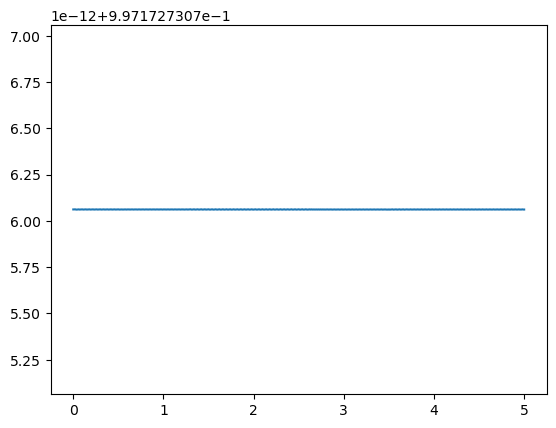

In [10]:
for i, U in enumerate(U_t):
    if i % 10 == 0:
        plt.cla()
        plt.plot(X, np.array(U)[:, 0])
        plt.savefig(f"graphs/{i}.png")

In [11]:
len(U_t)

3251